An example of intializing and running an episode of the current market implementation

In [1]:
import matplotlib.pyplot as plt
from market_model import Market

In [2]:
num_clusters = 5
initial_herding = 4
initial_p_buy = 0.3
initial_p_sell = 0.3
initial_p_hold = 0.4
t_end = 60

market = Market(num_clusters,initial_herding,initial_p_buy,initial_p_sell,initial_p_hold,t_end)

Initializing market currently many parameters are missing


In [3]:
market.run_market()

TODO update the clusters
TODO update probailities
TODO update the clusters
TODO update probailities
TODO update the clusters
TODO update probailities
TODO update the clusters
TODO update probailities
TODO update the clusters
TODO update probailities
TODO update the clusters
TODO update probailities
TODO update the clusters
TODO update probailities
TODO update the clusters
TODO update probailities
TODO update the clusters
TODO update probailities
TODO update the clusters
TODO update probailities
TODO update the clusters
TODO update probailities
TODO update the clusters
TODO update probailities
TODO update the clusters
TODO update probailities
TODO update the clusters
TODO update probailities
TODO update the clusters
TODO update probailities
TODO update the clusters
TODO update probailities
TODO update the clusters
TODO update probailities
TODO update the clusters
TODO update probailities
TODO update the clusters
TODO update probailities
TODO update the clusters
TODO update probailities


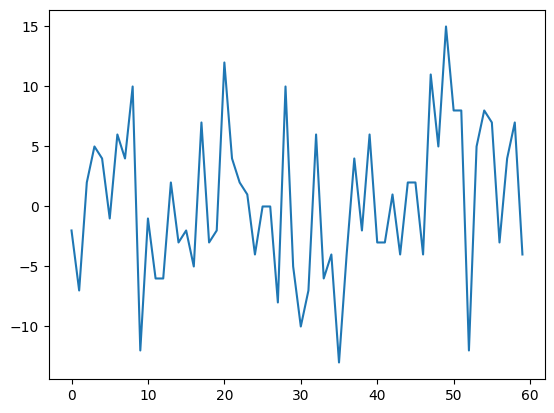

In [4]:
plt.plot(market.return_hist)

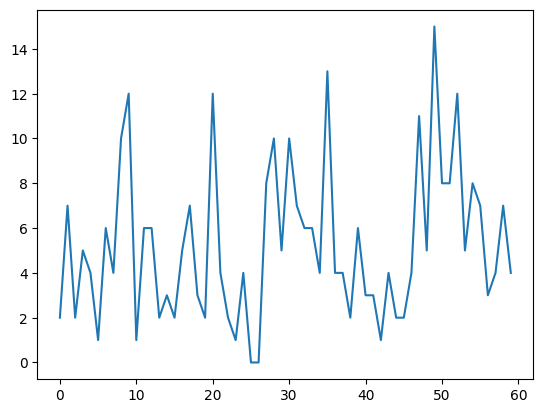

In [5]:
plt.plot(market.volatility_hist)